In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

## Load the Banking dataset

In [2]:
Banking_df=pd.read_csv(r'C:\Data_science\credit_risk_dataset.csv')

In [3]:
Banking_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
Banking_df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [5]:
Banking_df.shape

(32581, 12)

## Data Cleaning

### 1.Check duplicate rows

In [6]:
Banking_df.duplicated().value_counts()

False    32416
True       165
dtype: int64

In [7]:
Banking_df.drop_duplicates(keep='first',inplace=True)

In [8]:
Banking_df.duplicated().value_counts()

False    32416
dtype: int64

In [9]:
Banking_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [10]:
Banking_df.reset_index(inplace=True)

In [11]:
Banking_df.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [12]:
Banking_df.drop('index',axis=1,inplace=True)

In [13]:
Banking_df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32411,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32412,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32413,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32414,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32415,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [14]:
Banking_df.shape

(32416, 12)

### 2.Handling missing values

In [15]:
Banking_df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [16]:
np.round((Banking_df.isna().sum()/len(Banking_df))*100,2).astype(str)+'%'

person_age                     0.0%
person_income                  0.0%
person_home_ownership          0.0%
person_emp_length             2.74%
loan_intent                    0.0%
loan_grade                     0.0%
loan_amnt                      0.0%
loan_int_rate                 9.55%
loan_status                    0.0%
loan_percent_income            0.0%
cb_person_default_on_file      0.0%
cb_person_cred_hist_length     0.0%
dtype: object

In [17]:
Banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32416 entries, 0 to 32415
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


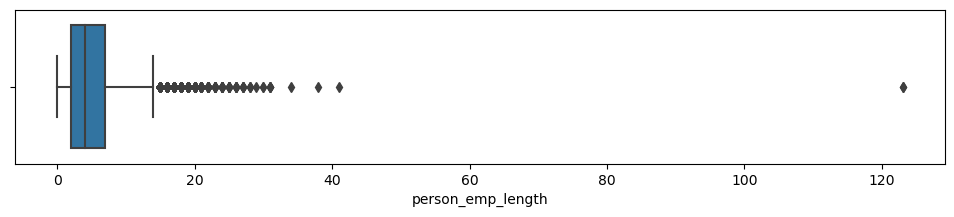

In [18]:
plt.figure(figsize=(12,2))
sns.boxplot(data=Banking_df,x=Banking_df[~Banking_df['person_emp_length'].isna()]['person_emp_length']);

**Insight** there are outliers in **person_emp_length** column so, i used median to replace the null values and it is numerical column

In [19]:
Banking_df['person_emp_length'].fillna(Banking_df['person_emp_length'].median(),inplace=True)

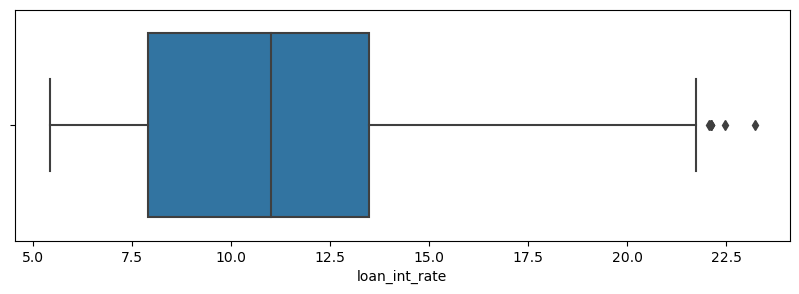

In [20]:
plt.figure(figsize=(10,3))
sns.boxplot(data=Banking_df,x=Banking_df[~Banking_df['loan_int_rate'].isna()]['loan_int_rate']);

**Insight** there are outliers in **loan_int_rate** column so,i used median to replace the null values and it is numerical column

In [21]:
Banking_df['loan_int_rate'].fillna(Banking_df['loan_int_rate'].median(),inplace=True)

In [22]:
Banking_df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [23]:
Banking_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32411,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32412,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32413,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32414,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [24]:
Banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32416 entries, 0 to 32415
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [25]:
Banking_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.768880,9593.845632,11.014662,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.090411,6322.730241,3.083050,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Data Visualization

In [26]:
Banking_df.select_dtypes(include=np.number).columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [27]:
Banking_df.select_dtypes(include='object').columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

## Count Plot 

In [28]:
Banking_df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

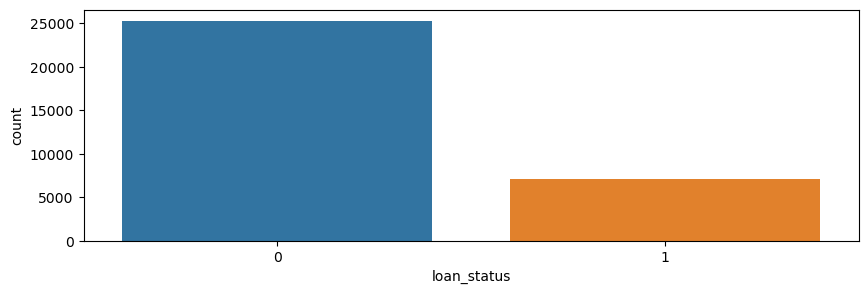

In [29]:
plt.figure(figsize=(10,3))
sns.countplot(data=Banking_df,x='loan_status');

## insight:

by above plot, i observed that **loan_status** of **0** are more compared to approved loan

## Scatter plot

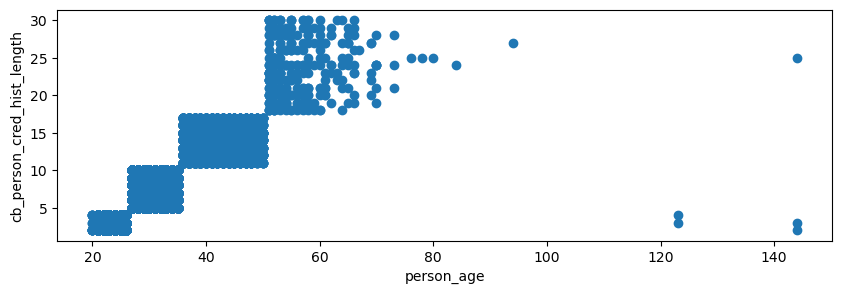

In [30]:
plt.figure(figsize=(10,3))
plt.scatter(x=Banking_df['person_age'],y=Banking_df['cb_person_cred_hist_length'])
plt.xlabel('person_age')
plt.ylabel('cb_person_cred_hist_length');

## insight:

by above plot,i observed that **person_age** and **cb_person_cred_hist_length** are related to each other i.e, if person_income increases then cb_person_cred_hist_length also increases 

## Count plot  

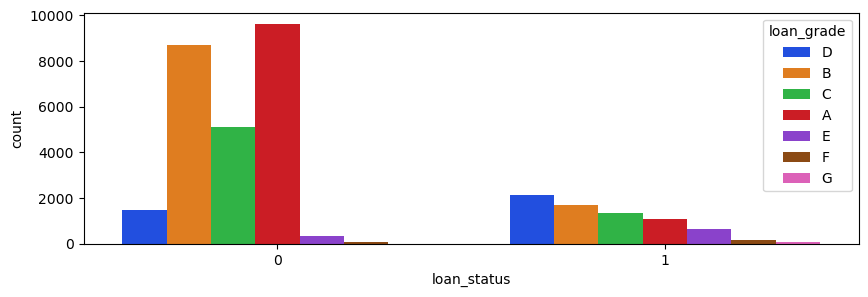

In [31]:
plt.figure(figsize=(10,3))
sns.countplot(data=Banking_df,x='loan_status',hue='loan_grade',palette='bright');

## insight:

by above plot,i observed that **loan_status** of **0** has highest grade **A** and **B**.

## Correlation matrix

In [48]:
corr_matrix=Banking_df.corr(method='pearson')
corr_matrix.style.background_gradient(cmap='coolwarm')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173293,0.161342,0.050680,0.011074,-0.022698,-0.042300,0.859215
person_income,0.173293,1.000000,0.134791,0.265947,0.000826,-0.145005,-0.254472,0.117614
person_emp_length,0.161342,0.134791,1.000000,0.113934,-0.051462,-0.082517,-0.054024,0.143251
loan_amnt,0.050680,0.265947,0.113934,1.000000,0.139596,0.105736,0.572824,0.041865
loan_int_rate,0.011074,0.000826,-0.051462,0.139596,1.000000,0.320081,0.114411,0.015000
loan_status,-0.022698,-0.145005,-0.082517,0.105736,0.320081,1.000000,0.379697,-0.016498
loan_percent_income,-0.042300,-0.254472,-0.054024,0.572824,0.114411,0.379697,1.000000,-0.031457
cb_person_cred_hist_length,0.859215,0.117614,0.143251,0.041865,0.015000,-0.016498,-0.031457,1.000000


## insight:

by above plot, i observed that **person_age** and **cb_person_cred_hist_length** are directly proportional to each other somewhat where remaining are inversely proportional to each other

## Bar plot

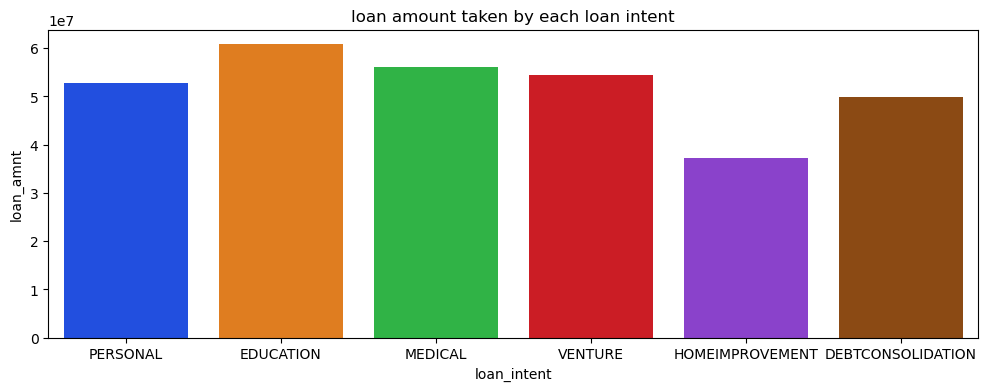

In [47]:
plt.figure(figsize=(12,4))
sns.barplot(x='loan_intent',y='loan_amnt',data=Banking_df,ci=None,estimator=np.sum,palette='bright')
plt.title('loan amount taken by each loan intent');

## insight:

by above plot,i observed that **loan_amount** taken by **loan_intent** of education is more while compared to others

## Pie plot

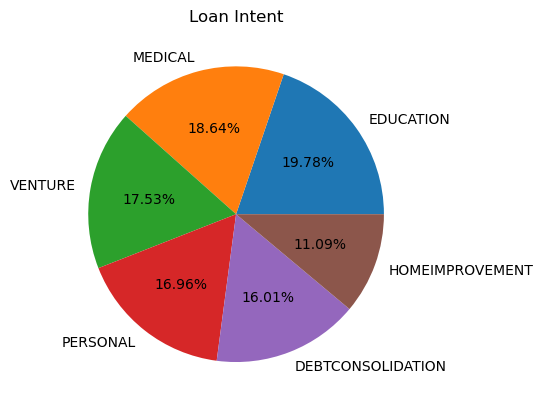

In [34]:
plt.pie(x = Banking_df.loan_intent.value_counts().values,
       labels = Banking_df.loan_intent.value_counts().index,
       autopct = '%.2f%%')
plt.title('Loan Intent');

## insight

by above plot, i observed that **education loan** taken by the customers is **19.78%** and it is more while compared to other loans

## Count plot

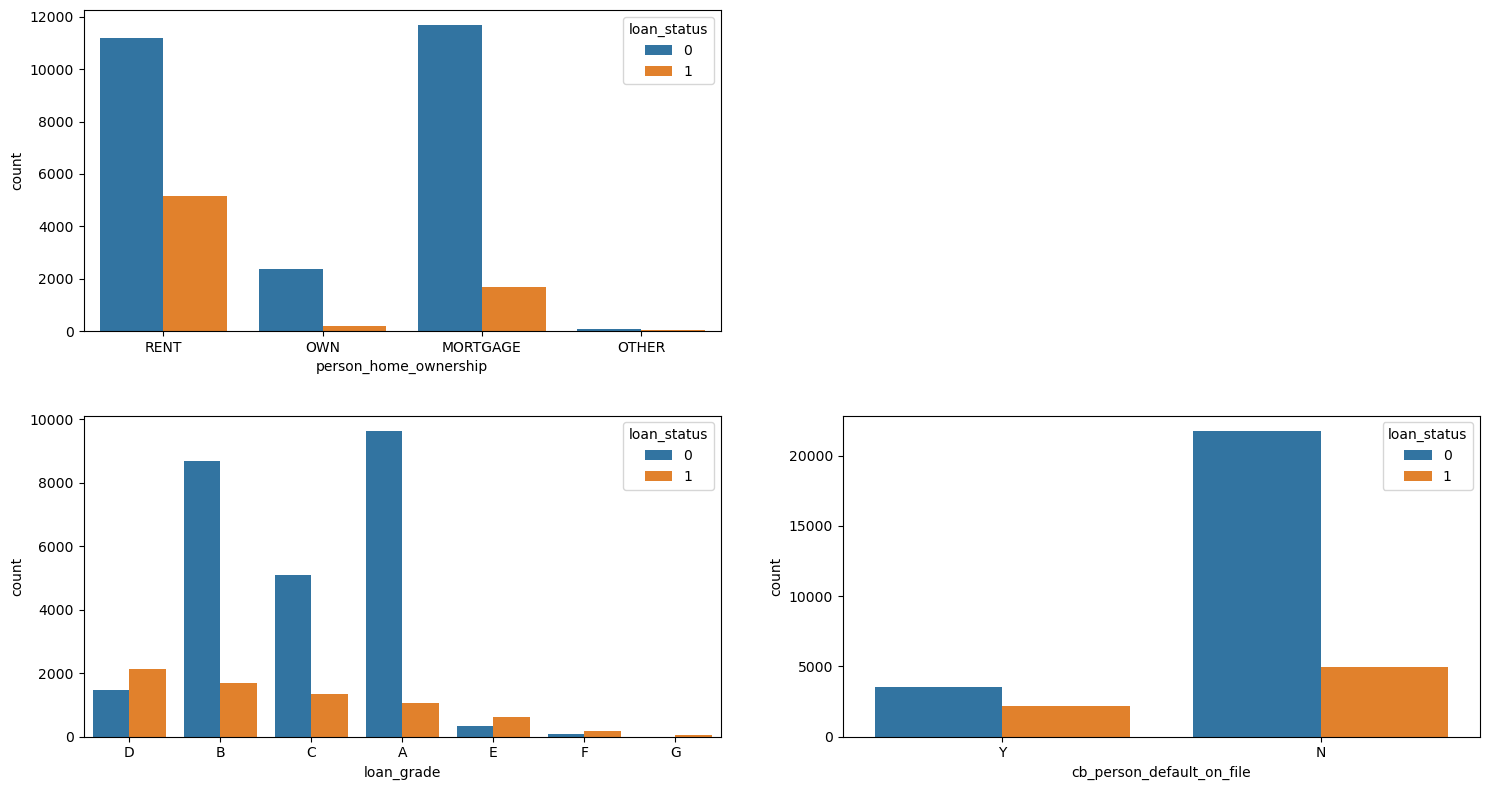

In [46]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.countplot('person_home_ownership',hue='loan_status',data=Banking_df)

plt.subplot(223)
sns.countplot('loan_grade',hue='loan_status',data=Banking_df)

plt.subplot(224)
sns.countplot('cb_person_default_on_file',hue='loan_status',data=Banking_df)
plt.tight_layout(h_pad=2.8,w_pad=3.5);

## insight

by above plot, i observed that **loan_status** of 0 is more in person_home_ownership,loan_grade,cb_person_default_on_file

## distribution plot

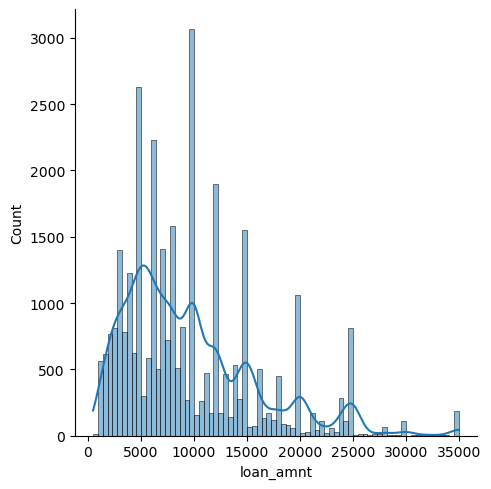

In [35]:
sns.displot(data=Banking_df,x='loan_amnt',kde=True);

## insight:

by above plot, i observed that **loan_amount** is positively skewed which means the column has outliers.

## Log transformation

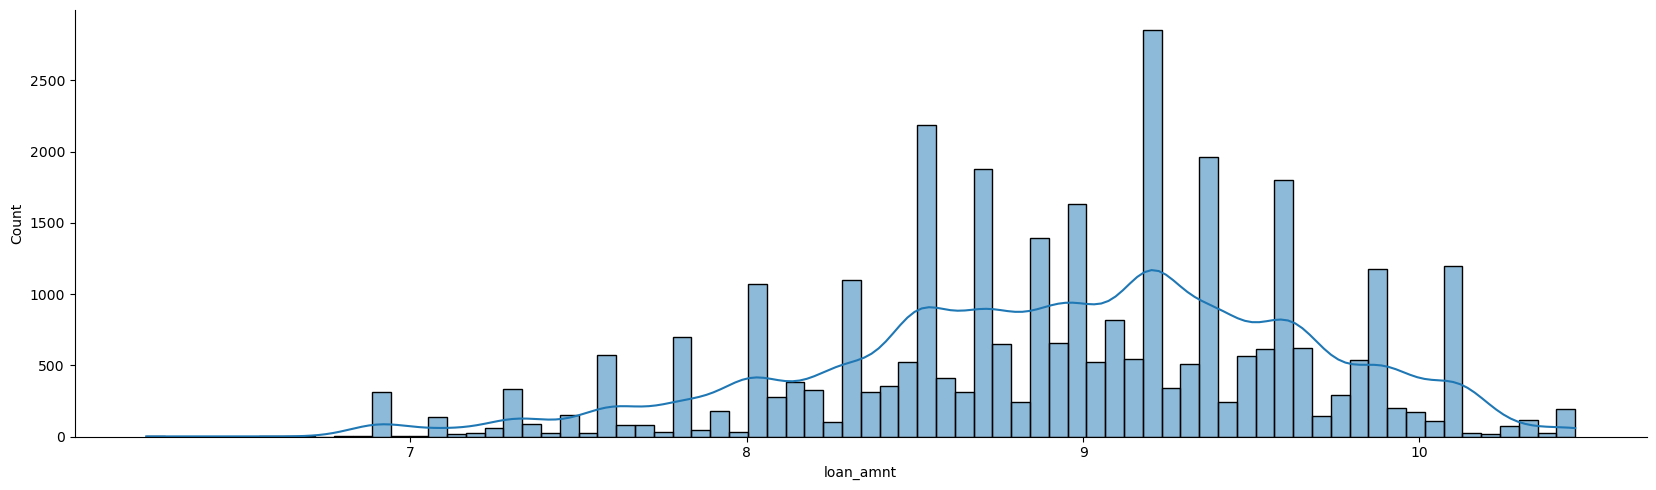

In [36]:
sns.displot(np.log(Banking_df.loan_amnt),kde=True,height=5,aspect=10/3);

## insight:

**log transformation** is used to deal with outliers as we see the plot is normally distributed after applied log transformation

## box plot

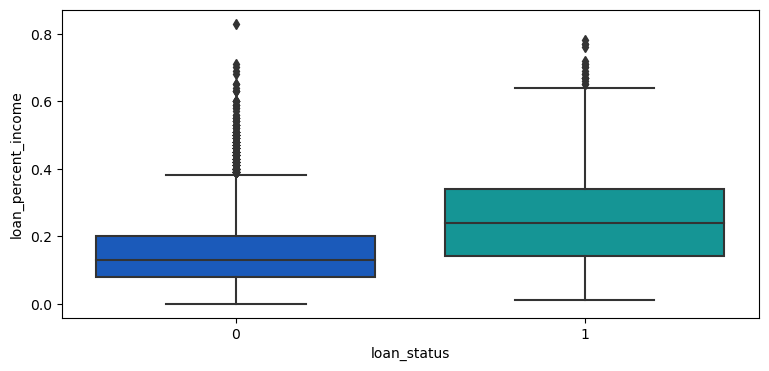

In [37]:
plt.figure(figsize=(9,4))
sns.boxplot(x='loan_status',y='loan_percent_income',data=Banking_df,palette='winter');

## insight:

by above plot, i observed that outliers are more in both **loan_status** 0 and 1. 

## Pair plot

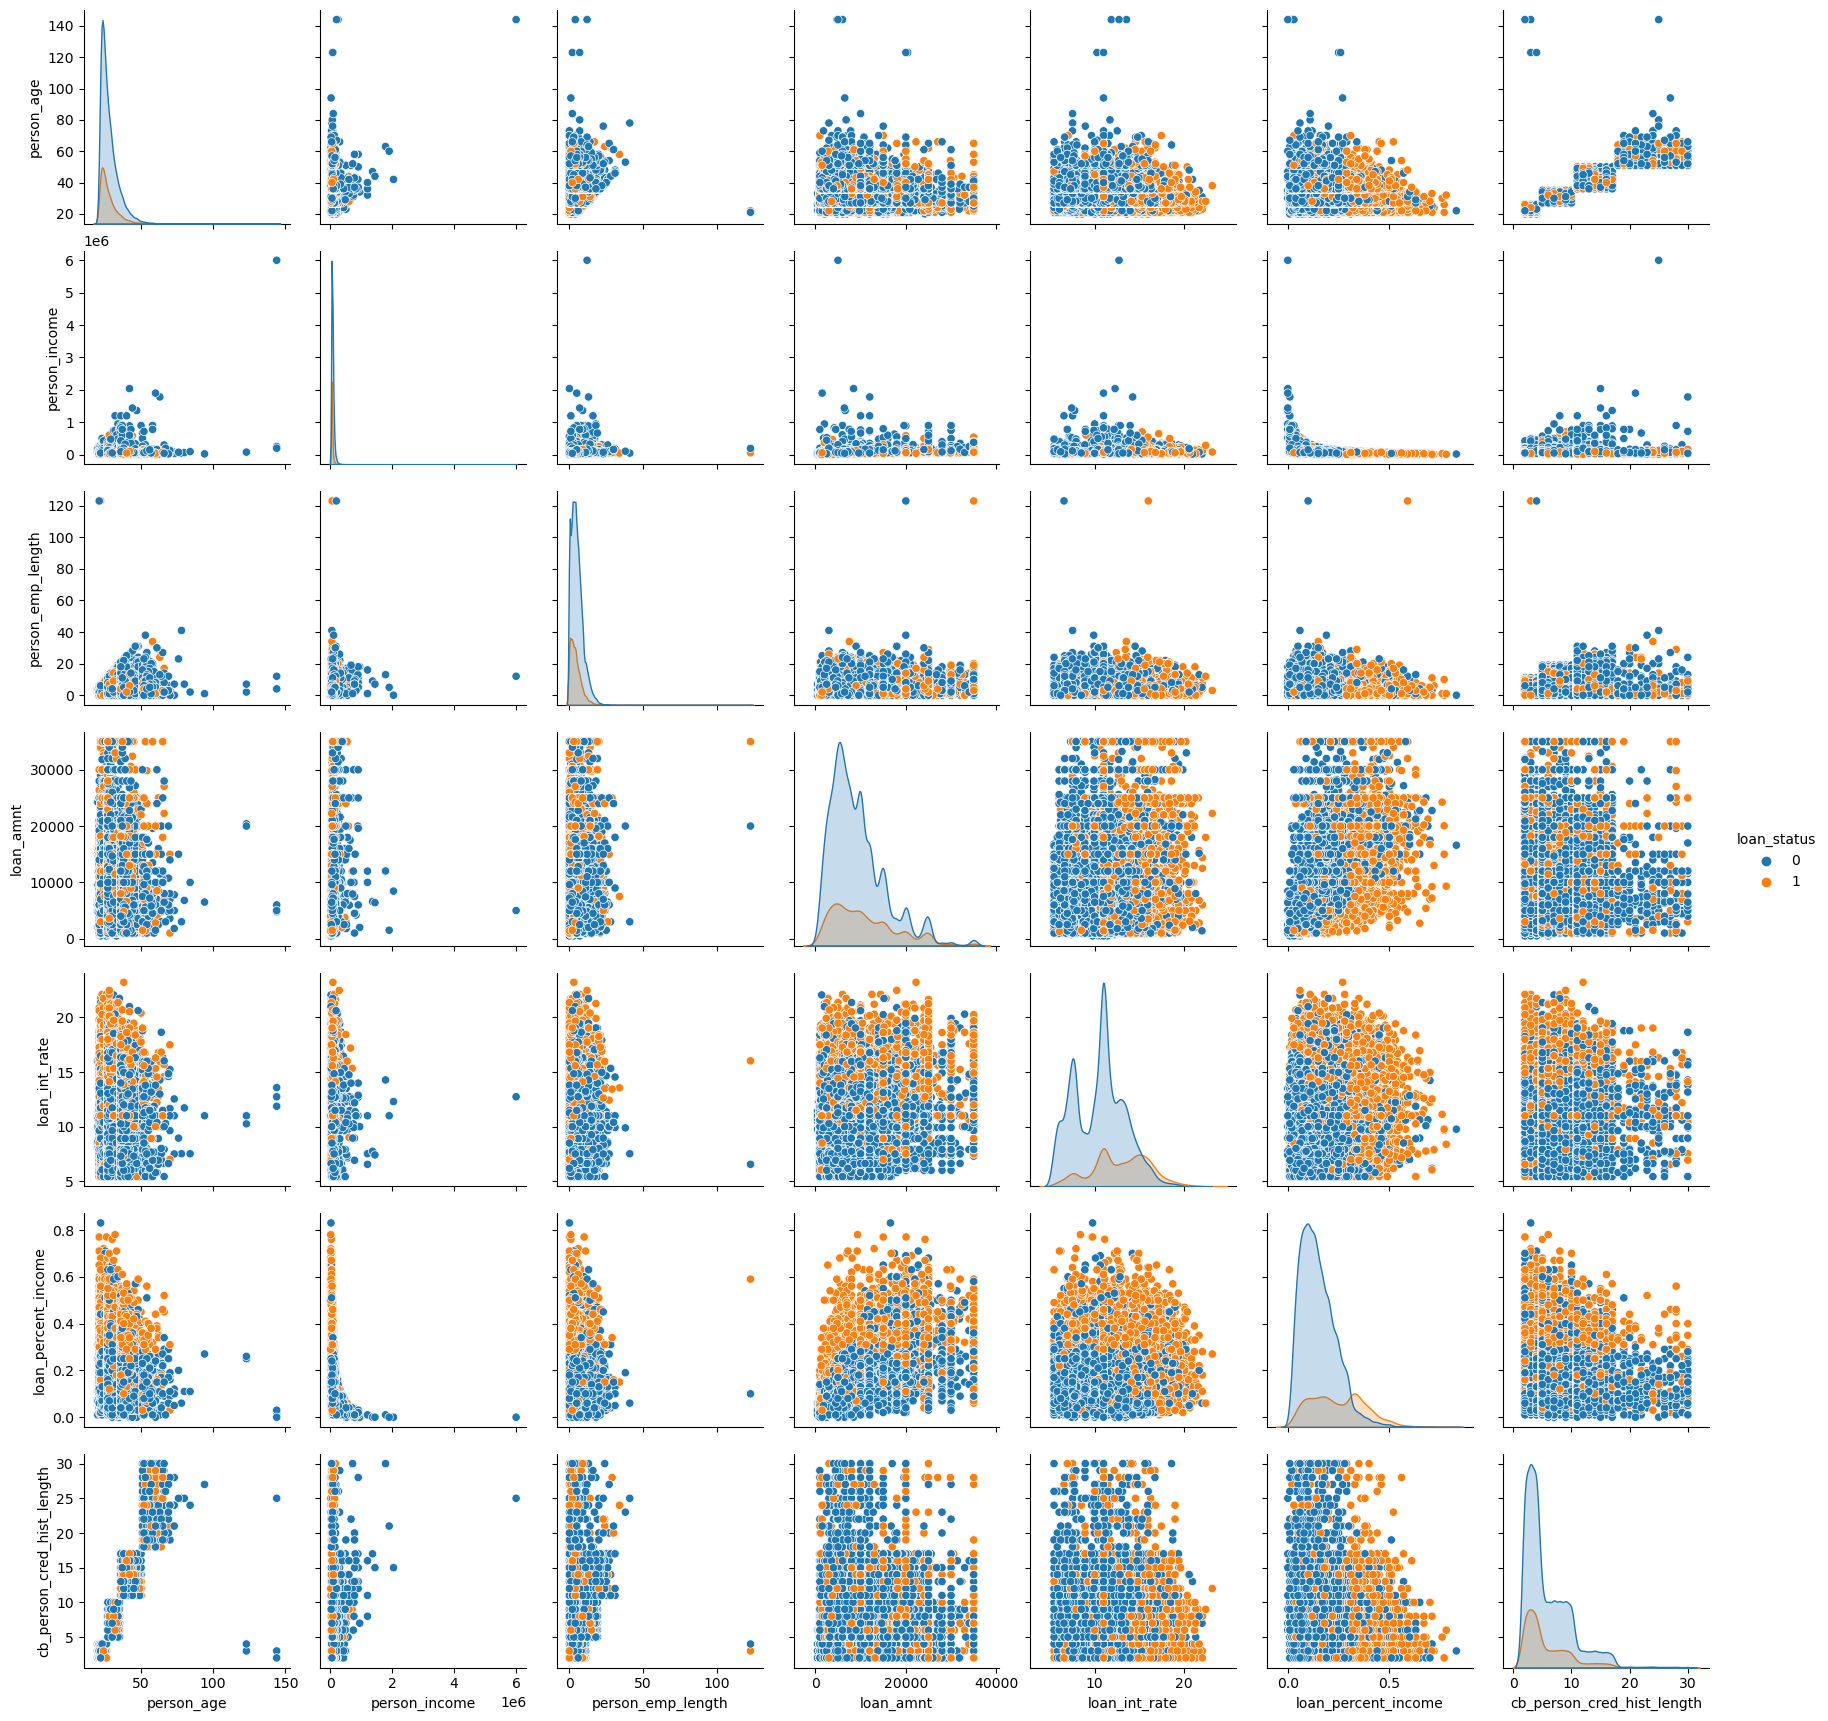

In [38]:
sns.pairplot(Banking_df,hue="loan_status");

## insight:

by above plot, i observed that the data positively skewed 